# 1. Import & Setting

### 1-1) Change Directory

In [1]:
import os
# Do! 프로젝트 root 경로로 설정
project_path = "C:/workspace/Bus Project"
os.chdir(project_path)

### 1-2) Import

In [2]:
import numbers
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import bus.analyzer as anz

In [3]:
class GeoUtil:
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1)
        if dLon >= 180:   
            dLon -= 360   
        dLat = y2-y1      
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)

In [4]:
def get_dist_from_most_adjacent_station_per_each_station(df):
    local_X_list, local_Y_list = list(df['station_longitude']), list(df['station_latitude'])
    local_list = [(local_X_list[i], local_Y_list[i]) for i in range(len(local_X_list))]
    
    min_dist_list = []

    for i in range(len(local_list)):
        minimum = sys.maxsize
        
        temp = 0
        
        for j in range(len(local_list)):
            if i == j:
                continue

            dist = GeoUtil.get_harversion_distance(local_list[i][0], local_list[i][1],
                                                   local_list[j][0], local_list[j][1])
            if minimum > dist:
                temp = j
                minimum = dist

        if dist == 0:
            print(i, j)

        dist = minimum
        min_dist_list.append(dist)

    min_dist_list.sort()
    min_dist_list = pd.Series(min_dist_list)
    
    return min_dist_list

### 제주도 수행 결과

In [5]:
df = anz.load_station_df()
df['city'] = df['station_address']
df.loc[:, 'city'] = df.loc[:, 'station_address'].apply(lambda string: len(string.split(' ')))
df =  df[df["city"] != 1]
df.loc[:, 'city'] = df.loc[:, 'station_address'].apply(lambda string: string.split(' ')[1])
result_path = 'data/image'

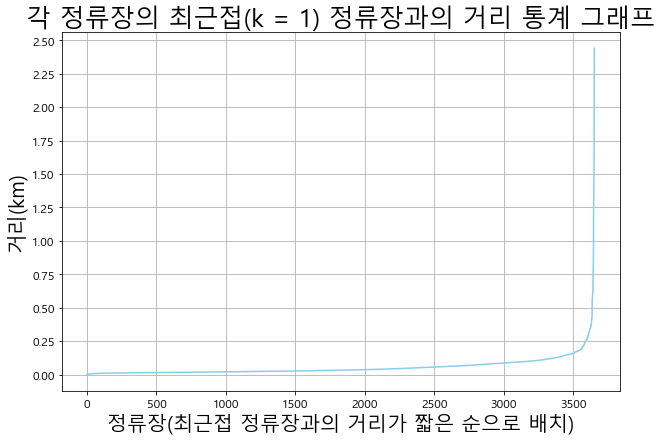

In [6]:
min_dist_list = get_dist_from_most_adjacent_station_per_each_station(df)
jejudo = min_dist_list

fig_title = '각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']

plt.yticks(np.linspace(0, 2.5, 11))

plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title, fontsize=25)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)', fontsize=20)
plt.ylabel('거리(km)', fontsize=20)
plt.plot(jejudo, color = 'skyblue')
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [7]:
min_dist_list.mean(), min_dist_list.max(), min_dist_list.min() # 단위: km

(0.05652327859879584, 2.44025, 0.00093)

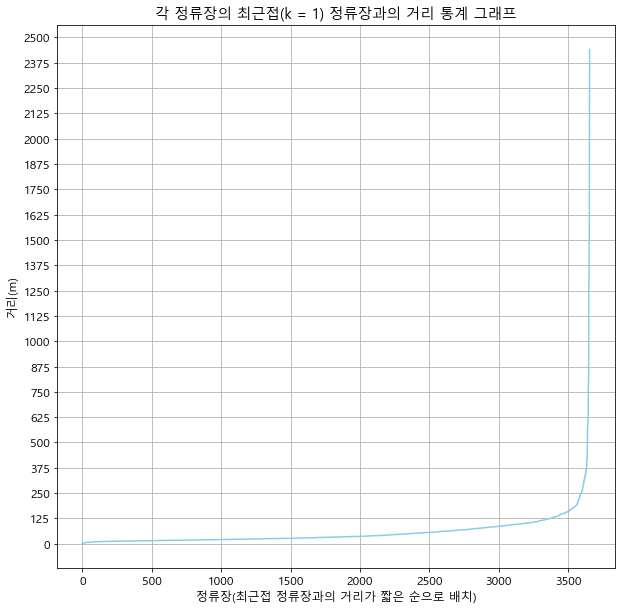

In [8]:
fig_title = '각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

jejudo = jejudo * 1000

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 10))
plt.yticks(np.linspace(0, 2500, 21))
# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(m)')
plt.plot(jejudo, color = 'skyblue')
plt.gcf().savefig(result_path + '/' + 'm단위 ' + fig_title)
plt.show()

### 서귀포시 수행 결과

In [9]:
seogwipo_city_station_df = df.query('city == "서귀포시"')

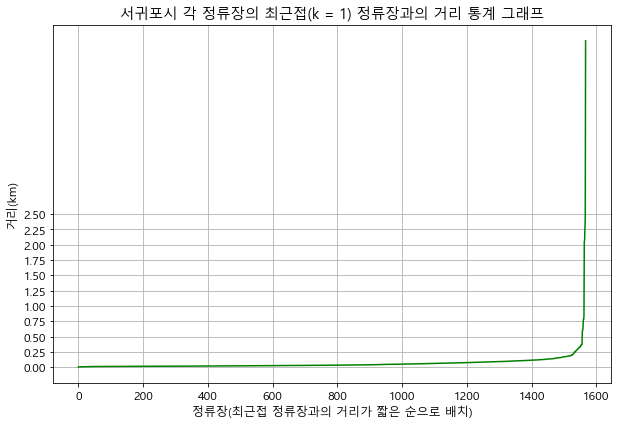

In [10]:
min_dist_list = get_dist_from_most_adjacent_station_per_each_station(seogwipo_city_station_df)
seogwipo = min_dist_list

fig_title = '서귀포시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.yticks(np.linspace(0, 2.5, 11))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(km)')
plt.plot(seogwipo, color = 'green')
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [11]:
min_dist_list.mean(), min_dist_list.max(), min_dist_list.min() # 단위: km

(0.06445866709183672, 5.32569, 0.00372)

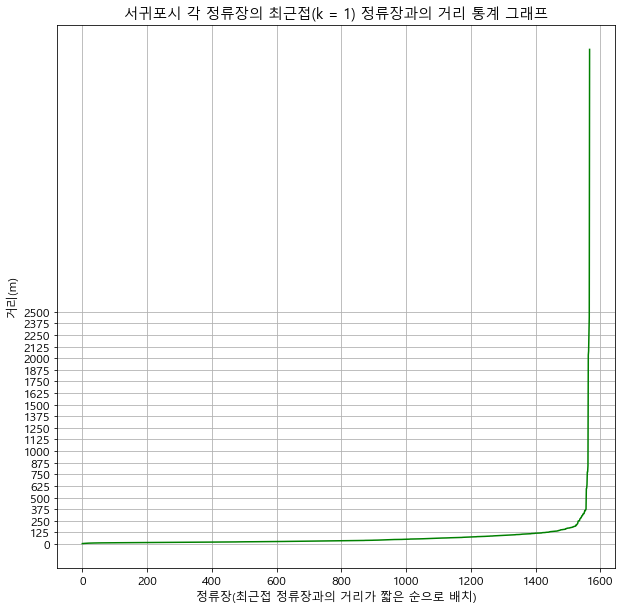

In [12]:
fig_title = '서귀포시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

seogwipo = seogwipo * 1000

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 10))
plt.yticks(np.linspace(0, 2500, 21))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(m)')
plt.plot(seogwipo, color = 'green')
plt.gcf().savefig(result_path + '/' + 'm단위 ' + fig_title)
plt.show()

### 제주시 수행 결과

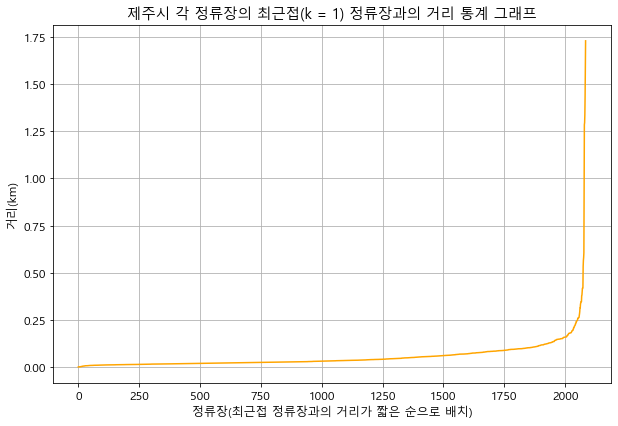

In [13]:
jeju_city_station_df = df.query('city == "제주시"')
min_dist_list = get_dist_from_most_adjacent_station_per_each_station(jeju_city_station_df)
jejusi = min_dist_list[:-1] # 마지막 데이터가 지나치게 이상해서 임의로 미포함시킴...

fig_title = '제주시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 6.6))
plt.yticks(np.linspace(0, 2.5, 11))
plt.xticks(np.linspace(0, 2000, 9))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(km)')
plt.plot(jejusi, color = 'orange')
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [14]:
jejusi.mean(), jejusi.max(), jejusi.min() # 단위: km

(0.05666767386091132, 1.72773, 0.00093)

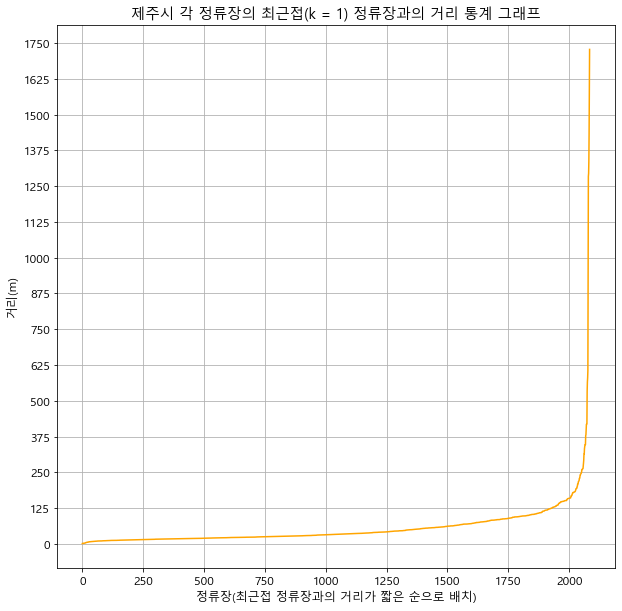

In [15]:
fig_title = '제주시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

jejusi = jejusi * 1000

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 10))
plt.yticks(np.linspace(0, 2500, 21))
plt.xticks(np.linspace(0, 2000, 9))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(m)')
plt.plot(jejusi, color = 'orange')
plt.gcf().savefig(result_path + '/' + 'm단위 ' + fig_title)
plt.show()